In [1]:
import torch
import torch.nn as nn

torch.manual_seed(1)

rnn_layer = nn.RNN(input_size=5, hidden_size=2, num_layers=1, batch_first=True)


In [7]:
w_hh = rnn_layer.weight_hh_l0
w_xh = rnn_layer.weight_ih_l0
b_hh = rnn_layer.bias_hh_l0
b_xh = rnn_layer.bias_ih_l0

In [8]:
print('W_xh 크기:', w_xh.shape)
print('W_hh 크기:', w_hh.shape)
print('b_xh 크기:', b_xh.shape)
print('b_hh 크기:', b_hh.shape)


W_xh 크기: torch.Size([2, 5])
W_hh 크기: torch.Size([2, 2])
b_xh 크기: torch.Size([2])
b_hh 크기: torch.Size([2])


In [9]:
x_seq = torch.tensor([[1.0]*5, [2.0]*5, [3.0]*5]).float()

In [10]:
# I am boy
x_seq

tensor([[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]])

In [11]:
output, hn = rnn_layer(torch.reshape(x_seq, (1, 3, 5)))


In [17]:
print(output)
print(hn)

tensor([[[-0.3520,  0.5253],
         [-0.6842,  0.7607],
         [-0.8649,  0.9047]]], grad_fn=<TransposeBackward1>)
tensor([[[-0.8649,  0.9047]]], grad_fn=<StackBackward0>)


In [27]:
out_man = []
for t in range(3):
    xt = torch.reshape(x_seq[t], (1,5))
    print(f"타입 스템 {t} -> 입력 {xt.numpy()}")

    ht = torch.matmul(xt, torch.transpose(w_xh, 0, 1)) + b_xh
    print(f'은닉  -> {ht}')

    if t>0:
        prev_h = out_man[t-1]
    else:
        prev_h = torch.zeros((ht.shape))

    ot = ht + torch.matmul(prev_h, torch.transpose(w_hh, 0, 1)) + b_hh
    ot = torch.tanh(ot)
    out_man.append(ot)
    print( f" 출력(수동) --> {ot.detach().numpy()}   ")
    print( f" RNN 출력 --> {output[:, t].detach().numpy()}   ")


타입 스템 0 -> 입력 [[1. 1. 1. 1. 1.]]
은닉  -> tensor([[-0.4702,  0.5864]], grad_fn=<AddBackward0>)
 출력(수동) --> [[-0.3519801   0.52525216]]   
 RNN 출력 --> [[-0.3519801   0.52525216]]   
타입 스템 1 -> 입력 [[2. 2. 2. 2. 2.]]
은닉  -> tensor([[-0.8888,  1.2364]], grad_fn=<AddBackward0>)
 출력(수동) --> [[-0.68424344  0.76074266]]   
 RNN 출력 --> [[-0.68424344  0.76074266]]   
타입 스템 2 -> 입력 [[3. 3. 3. 3. 3.]]
은닉  -> tensor([[-1.3075,  1.8865]], grad_fn=<AddBackward0>)
 출력(수동) --> [[-0.8649416   0.90466356]]   
 RNN 출력 --> [[-0.8649416   0.90466356]]   


In [30]:
pip install datasets

   ---------------------------------------- 0.0/553.3 kB ? eta -:--:--
   ---------------------------------------- 553.3/553.3 kB 9.4 MB/s  0:00:00
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ---------------------------------------- 3.6/3.6 MB 21.6 MB/s  0:00:00

   -------- ------------------------------- 1/5 [multiprocess]
   -------- ------------------------------- 1/5 [multiprocess]
   -------- ------------------------------- 1/5 [multiprocess]
   ---------------- ----------------------- 2/5 [hf-xet]
   ---------------- ----------------------- 2/5 [hf-xet]
   ------------------------ --------------- 3/5 [huggingface-hub]
   ------------------------ --------------- 3/5 [huggingface-hub]
   ------------------------ --------------- 3/5 [huggingface-hub]
   ------------------------ --------------- 3/5 [huggingface-hub]
   ------------------------ --------------- 3/5 [huggingface-hub]
   ------------------------ --------------- 3/5 [huggingface-hub]
   ------

In [31]:
from datasets import load_dataset

In [32]:
dataset = load_dataset("imdb")

README.md: 0.00B [00:00, ?B/s]

C:\Users\playdata2\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\playdata2\.cache\huggingface\hub\datasets--imdb. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [35]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [36]:
import torch
from torch.utils.data.dataset import random_split
torch.manual_seed(1)
train_dataset, valid_dataset = random_split(
    list(train_dataset), [20000, 5000])


In [39]:
import re
from collections import Counter, OrderedDict


In [41]:
token_counts = Counter()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    tokenized = text.split()
    return tokenized


for data in train_dataset:
    tokens = tokenizer(data['text'])
    token_counts.update(tokens)

In [46]:
len(token_counts)

69023

In [48]:
sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x : x[1], reverse=True)


In [50]:
ordered_dict = OrderedDict(sorted_by_freq_tuples)

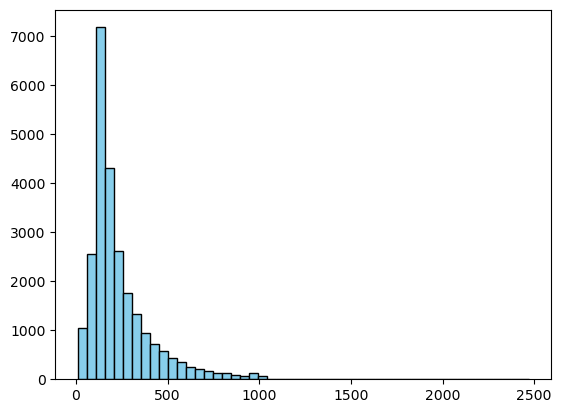

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset("imdb", split="train")
df = pd.DataFrame(dataset)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
plt.hist(df['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.show()


In [57]:
vocab = {"<pad>" : 0 , "<unk>" : 1}
for key, val in enumerate(ordered_dict.keys()):
    vocab[val] = key+2


In [59]:
print([vocab[token] for token in ['this', 'is', 'an', 'example']])


[11, 7, 35, 457]


In [62]:
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [63]:
device

device(type='cpu')

In [68]:
text_pipeline = lambda x: [vocab.get(token, 1) for token in tokenizer(x)]
label_pipeline = lambda x: float(x)


In [72]:
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    
    for _sample in batch:
        _label = _sample['label']
        _text = _sample['text']
        
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        
        lengths.append(processed_text.size(0))

    label_list = torch.tensor(label_list, dtype=torch.float32)
    lengths = torch.tensor(lengths, dtype=torch.int64)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True, padding_value=0
    )

    return padded_text_list.to(device), label_list.to(device), lengths.to(device)


In [73]:
from torch.utils.data import DataLoader

batch_size = 32

train_dl = DataLoader(train_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(valid_dataset, batch_size=batch_size,
                      shuffle=False, collate_fn=collate_batch)
test_dl = DataLoader(test_dataset, batch_size=batch_size,
                     shuffle=False, collate_fn=collate_batch)


In [78]:
text_batch, label_batch, length_batch = next(iter(train_dl))

In [79]:
length_batch

tensor([251, 249, 139,  94, 169, 125, 460,  44, 203, 669, 220, 243, 477, 272,
        129, 131, 215,  12, 430, 195,  91, 303, 331, 129, 129, 147, 121, 210,
        229, 152, 281, 129])

In [86]:
embedding = nn.Embedding(num_embeddings=10,
                         embedding_dim=3,
                         padding_idx=0)

In [87]:
text_encoded_input = torch.LongTensor([[1,2,4,5],[4,3,2,0]])

In [88]:
embedding(text_encoded_input)

tensor([[[-2.9056,  0.9349,  0.4973],
         [-0.9374, -0.6541, -1.2451],
         [ 1.2648,  0.2183, -2.2485],
         [ 1.0599, -2.2663,  1.3410]],

        [[ 1.2648,  0.2183, -2.2485],
         [ 0.4607, -0.0680,  0.1856],
         [-0.9374, -0.6541, -1.2451],
         [ 0.0000,  0.0000,  0.0000]]], grad_fn=<EmbeddingBackward0>)

In [91]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, hidden = self.rnn(x)
        out = hidden[-1, :, :]
        out = self.fc(out)
        return out
        

In [93]:
model = RNN(64, 32)

In [94]:
print(model)

RNN(
  (rnn): RNN(64, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [110]:
model(torch.randn(5,3,64))

tensor([[0.0215],
        [0.6220],
        [0.2509],
        [0.2779],
        [0.2444]], grad_fn=<AddmmBackward0>)

In [114]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size,
                                      embed_dim,
                                      padding_idx=0)
        self.rnn = nn.RNN(embed_dim, rnn_hidden_size,
                           batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [115]:
vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)


In [116]:
def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(list(dataloader.dataset)), total_loss/len(list(dataloader.dataset))

In [117]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

torch.manual_seed(1)

for epoch in range(num_epochs):
    print(f"epoch -> {epoch}")
    acc_train, loss_train = train(train_dl)
    acc_valid, loss_valid = evaluate(valid_dl)
    print(f'에포크 {epoch} 정확도: {acc_train:.4f} 검증 정확도: {acc_valid:.4f}')

epoch -> 0
에포크 0 정확도: 0.5486 검증 정확도: 0.5480
epoch -> 1
에포크 1 정확도: 0.6018 검증 정확도: 0.5866
epoch -> 2
에포크 2 정확도: 0.6575 검증 정확도: 0.6040
epoch -> 3
에포크 3 정확도: 0.6922 검증 정확도: 0.7028
epoch -> 4
에포크 4 정확도: 0.7594 검증 정확도: 0.7366
epoch -> 5
에포크 5 정확도: 0.7800 검증 정확도: 0.7296
epoch -> 6
에포크 6 정확도: 0.7921 검증 정확도: 0.6564
epoch -> 7
에포크 7 정확도: 0.7947 검증 정확도: 0.7610
epoch -> 8
에포크 8 정확도: 0.8041 검증 정확도: 0.6914
epoch -> 9
에포크 9 정확도: 0.8325 검증 정확도: 0.7176


In [118]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size,
                                      embed_dim,
                                      padding_idx=0)
        # self.rnn = nn.RNN(embed_dim, rnn_hidden_size,
        #                    batch_first=True)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,
                           batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        # out, hidden = self.rnn(out
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [119]:
vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)


In [120]:
def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(list(dataloader.dataset)), total_loss/len(list(dataloader.dataset))


In [122]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

torch.manual_seed(1)

for epoch in range(num_epochs):
    print(f"epoch -> {epoch}")
    acc_train, loss_train = train(train_dl)
    acc_valid, loss_valid = evaluate(valid_dl)
    print(f'에포크 {epoch} 정확도: {acc_train:.4f} 검증 정확도: {acc_valid:.4f}')
    

epoch -> 0
에포크 0 정확도: 0.6062 검증 정확도: 0.6584
epoch -> 1
에포크 1 정확도: 0.7053 검증 정확도: 0.7248
epoch -> 2
에포크 2 정확도: 0.7958 검증 정확도: 0.7960
epoch -> 3
에포크 3 정확도: 0.8475 검증 정확도: 0.7746
epoch -> 4
에포크 4 정확도: 0.8700 검증 정확도: 0.8178
epoch -> 5
에포크 5 정확도: 0.8898 검증 정확도: 0.8006
epoch -> 6


KeyboardInterrupt: 